
# ASSIGNED Solving nonlinear problems with an ODE



Suppose you want to solve a difficult nonlinear algebraic equation that cannot readily be solved with algebra. For example, consider $f(x) = x e^{-x}$, and you seek to find the value of $x$ that makes this function equal to 0.1. One way to do this is to use a nonlinear algebra solver. In this problem, we will consider a way to solve it by integrating a differential equation.

The idea is to derive the derivative of the function, $f'(x)$, and then solve the initial value problem with an event function that finds the solution you want.




## First plot the function



You should plot the function to see if there is a solution. Consider an x-range from 0 to 5. Comment on whether there are any solutions, and if so how many and approximately where they are.




## Derive f'(x)



This should be done by hand, and the result described in the next cell.




## Solve the ode



Now that you have an $f'(x)$ Solve the initial value problem with $f(0)$ over the x-range that you plotted the original function on. Use an event function to identify points where $f(x)=0.1$.

Prepare a plot of the solution that has the following features:

1.  Plot the original function provided in this problem.
2.  Plot the solution you got from integrating $f'(x)$.
3.  Plot where your solution points you found are.




## solution



Here is the plot of the function.



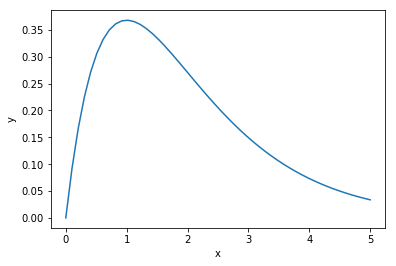

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0, 5)
plt.plot(x, x * np.exp(-x))
plt.xlabel('x')
plt.ylabel('y')

You can see there will be two solutions, one near x=0, and one closer to x=3.5.

You have to use the chain rule to derive $f'(x)$. It is $f'(x) = e^{-x} - x e^{-x}$. To find where the function is equal to 0.1, we use an event function. We do not make it terminal since there is more than one solution to find. We know from inspection that $f(0) = 0$.



In [1]:
def fp(x, y):
    return np.exp(-x) + x * (-np.exp(-x))

f0 = np.array([0]) # f(0) = 0
xspan = (0, 5)
xeval, h = np.linspace(*xspan, retstep=True)

from scipy.integrate import solve_ivp

def event(x, y):
    return y - 0.1

sol = solve_ivp(fp, xspan, f0, dense_output=True, max_step=h, events=event)
print(f'There are solutions at {sol.t_events[0]}')

There are solutions at [ 0.11183256  3.57715207]

We plot the numerical solution and the original function to make sure we didn't make a mistake in the ODE, as well as the solutions here.



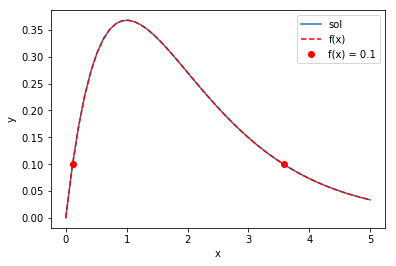

In [1]:
plt.plot(sol.t, sol.y.T)
plt.plot(x, x * np.exp(-x), 'r--')
plt.plot(sol.t_events[0], sol.sol(sol.t_events[0]).T, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['sol', 'f(x)', 'f(x) = 0.1'])

The solution for f(x) is indistinguishable from f(x), so we have confidence that the integration worked, and we can see the solutions are in the right place.



## Miscellaneous notes

Some of you plotted $f(x)=0.1$ by linspace or arrays. The following axhline is more easier to show horizontal line.

(0, 5)

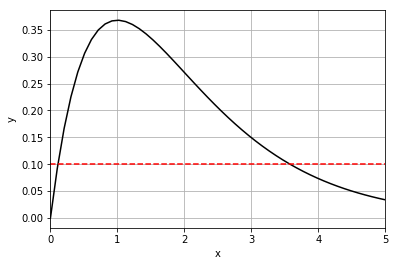

In [2]:
import numpy as np

def f(x):
    return x*np.exp(-x)

x = np.linspace(0,5)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,f(x),'-k')
plt.axhline(y=0.1, color='r', linestyle='--')  # <--------this is to make a horizontal line.
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.xlim(0,5)